# Gaussian Noise

The purpose of this is to show the RMS values of noise sources add as expected in terms of power rather than amplitude.

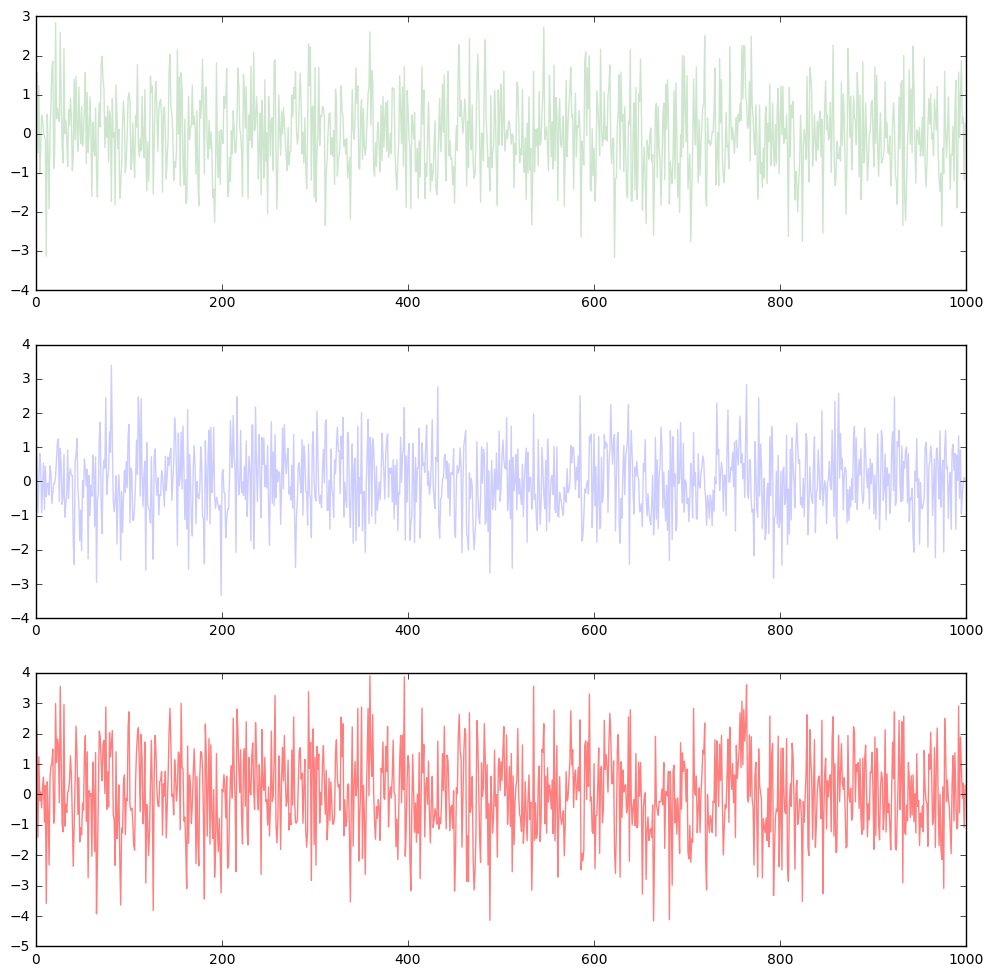

RMS 1: 1.01682946026
RMS 2: 1.00707838909
RMS 3: 1.42295729084 (from data)
RMS 3: 1.43113557465 (computed)


In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,12))

# Instrument noise
n1 = [np.random.normal(0, 1) for i in range(1000)]
plt.subplot(3, 1, 1)
plt.plot(n1, color='g', alpha=0.2)
rms1 = np.std(n1)

# Noise we are testing
n2 = [np.random.normal(0, 1) for i in range(1000)]
plt.subplot(3, 1, 2)
plt.plot(n2, color='b', alpha=0.2)
rms2 = np.std(n2)

# The sum of the noises
n3 = [n1[i] + n2[i] for i in range(1000)]
plt.subplot(3, 1, 3)
plt.plot(n3, color='r', alpha=0.5)
rms3 = np.std(n3)

# Plot the various noises
plt.show()

# Compute the RMS noise from the instrument and test noise
rms4 = math.sqrt(rms1**2 + rms2**2)

# Print the computed RMS values
print("RMS 1: " + str(rms1))
print("RMS 2: " + str(rms2))
print("RMS 3: " + str(rms3) + " (from data)")
print("RMS 3: " + str(rms4) + " (computed)")
